In [1]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,202 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [3]:
#!pip install git+https://github.com/haven-jeon/PyKoSpacing.git

In [3]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 4.7 MB/s 
     |████████████████████████████████| 453 kB 53.0 MB/s 


In [4]:
import pandas as pd
import numpy as np
from konlpy.tag import Okt
from collections import Counter
import konlpy, re, tqdm, os
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='NanumBarunGothic') 

In [5]:
deliver = pd.read_csv('/content/drive/MyDrive/cj대한통운 공모전/미래기술챌린지 2022_⑤크라우드 소싱 모바일 배송 어플리케이션 구현_배송data.csv')
deliver.head()

,Unnamed: 0,집배일자,집배시간,배송기사번호,보내는분,보내는분주소,받는분,받는분주소,카테고리
0,0,20220501,111002,57,f156d5b5031a7759f68de035e3285b92\n,경기도 파주시 월롱면 ****,190f19687af934e0dd00fd9a089cd45a\n,서울특별시 마포구 월드컵북로 ****,식품
1,1,20220501,111012,57,7e92b741c4a5ae86318d4e0641470fa0\n,대전광역시 동구 은어송로 ****,c216b29caa8189a72678d672f30b339f\n,서울특별시 마포구 매봉산로2안길 ****,식품
2,2,20220501,95837,58,4fa3bdc7d689a0c651f891d71b8ed04e\n,서울특별시 중랑구 상봉동 ****,5a5a4207b520d0977207ddcf6ad2996d\n,서울 마포구 상암산로 ****,식품
3,3,20220501,72249,50,47a1f9fe187e76aa5f1c91ff168ba849\n,부산광역시 동래구 안락동 ****,086bd6d2251624cb6ed051357b62ae0d\n,서울특별시 강서구 양천로 ****,식품
4,4,20220501,71314,50,225a766ef6df1859bd145486332747ec\n,경북 구미시 봉곡로20길 ****,2ebd6a67b0c497a80d55427d5ba18d2c\n,서울특별시 마포구 공덕동 ****,식품


In [6]:
pick_up = pd.read_csv('/content/drive/MyDrive/cj대한통운 공모전/미래기술챌린지 2022_⑤크라우드 소싱 모바일 배송 어플리케이션 구현_집화data.csv')
pick_up.head(5)

,Unnamed: 0,집배일자,집배시간,배송기사번호,보내는분,보내는분주소,받는분,받는분주소,카테고리
0,0,20220501,155443,59,cd58c58adf30984d92a2ef5330996a15\n,서울 강남구 남부순환로 ****,f8a969aee4818600110f974b4a5fb13f\n,서울 구로구 경인로46길 ****,식품
1,1,20220501,155443,59,cd58c58adf30984d92a2ef5330996a15\n,서울 강남구 남부순환로 ****,3d2a939ba9631dfafab25c08cd5a43e4\n,경기 하남시 조정대로 ****,식품
2,2,20220501,155443,59,cd58c58adf30984d92a2ef5330996a15\n,서울 강남구 남부순환로 ****,8b77078ac26c3b3fcc3a92bfb109f55b\n,충남 아산시 탕정면 ****,식품
3,3,20220501,155443,59,cd58c58adf30984d92a2ef5330996a15\n,서울 강남구 남부순환로 ****,75fbaf4ba5e7188907c29d3d16f9c0ac\n,경기도 용인시 기흥구 ****,식품
4,4,20220501,155443,59,cd58c58adf30984d92a2ef5330996a15\n,서울 강남구 남부순환로 ****,b8df3f6ceb7a8633f7e837c10ed5eae4\n,경기도 파주시 월롱면 ****,식품


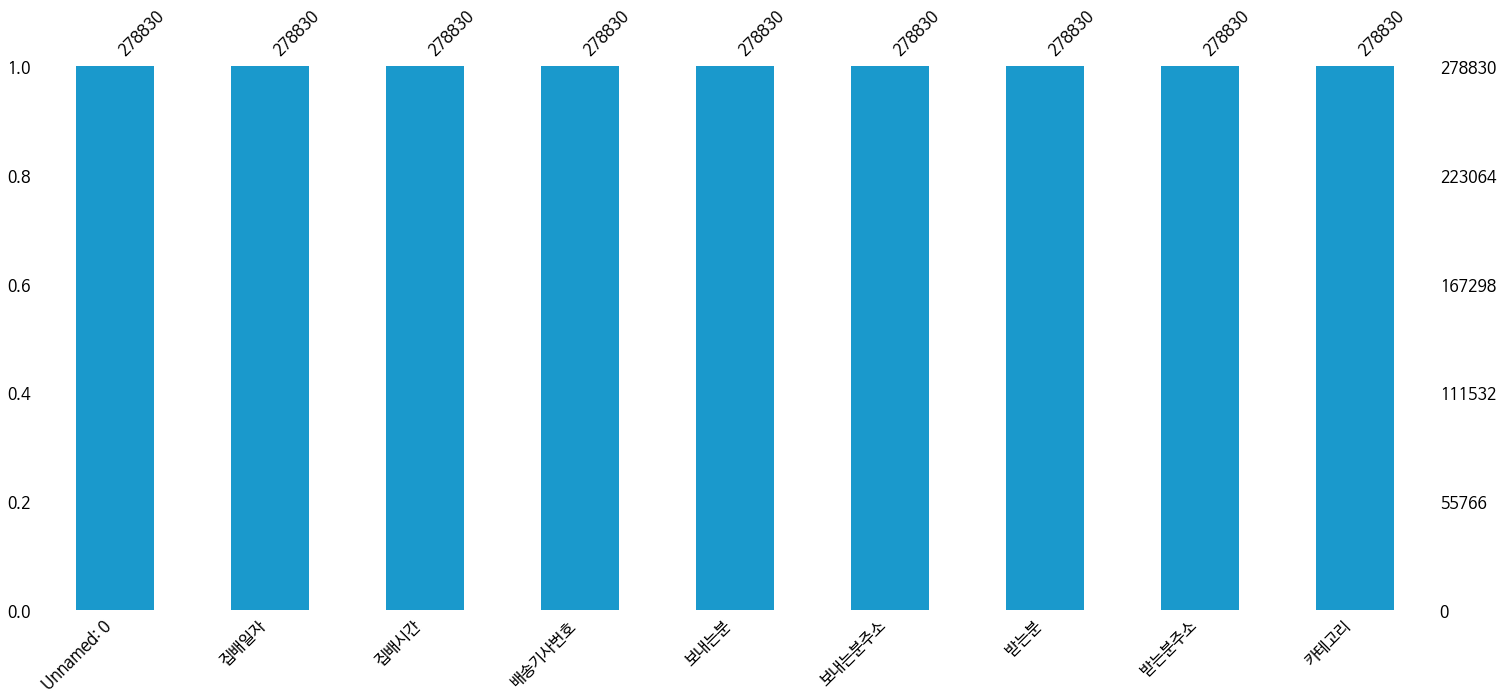

In [8]:
deliver.columns
import missingno as msno
msno.bar(df=deliver.iloc[:, :], color=(0.1, 0.6, 0.8))

In [9]:
deliver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278830 entries, 0 to 278829
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  278830 non-null  int64 
 1   집배일자        278830 non-null  int64 
 2   집배시간        278830 non-null  int64 
 3   배송기사번호      278830 non-null  int64 
 4   보내는분        278830 non-null  object
 5   보내는분주소      278830 non-null  object
 6   받는분         278830 non-null  object
 7   받는분주소       278830 non-null  object
 8   카테고리        278830 non-null  object
dtypes: int64(4), object(5)
memory usage: 19.1+ MB


In [13]:
data = deliver.배송기사번호.unique()
len(data)

20

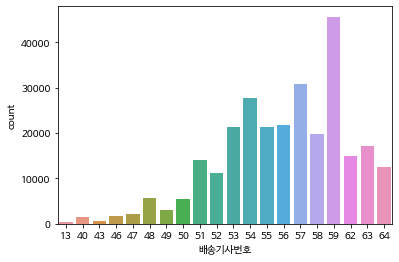

In [14]:
sns.countplot(x="배송기사번호", data=deliver)

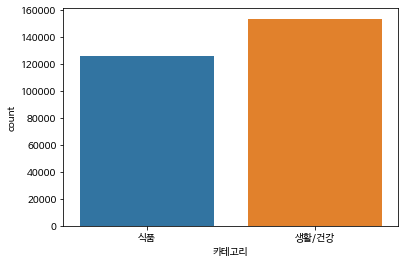

In [ ]:
sns.countplot(x="카테고리", data=deliver)

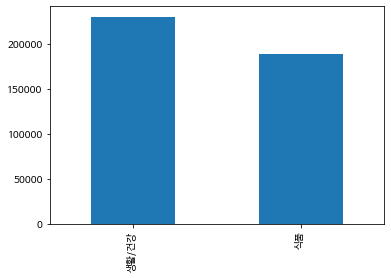

In [ ]:
pick_up.카테고리.value_counts().plot.bar()

In [7]:
def Preprocessing(text, tagger ,remove_stopwords = True, stop_words = []):
  text = re.sub('[^ ㄱ-ㅎ|가-힣|a-z|A-Z|0-9|一-龥]+','',text)#특수기호 선별
  word_text = tagger.morphs(text,stem=True)#형태소 분리 후 어간 추출

  if remove_stopwords:
    word_text = [t for t in word_text if not t in stop_words]
    
  return word_text

In [8]:
text = deliver.보내는분주소
type(text)

pandas.core.series.Series

In [9]:
text.to_csv('address.txt', index=False, header=None, sep="\t")
type(text)

pandas.core.series.Series

In [11]:
with open('address.txt', 'r', encoding='utf-8') as f:
    text = f.read()

In [12]:
okt = Okt()
nouns = okt.nouns(text) # 명사만 추출

words = [n for n in nouns if len(n) > 1] # 단어의 길이가 1개인 것은 제외

c = Counter(words) # 위에서 얻은 words를 처리하여 단어별 빈도수 형태의 딕셔너리 데이터를 구함

c

Counter({'경기도': 106327,
         '파주시': 17571,
         '월롱면': 2968,
         '대전광역시': 3184,
         '동구': 2719,
         '은어': 17,
         '송로': 47,
         '서울특별시': 41166,
         '중랑구': 2512,
         '상봉동': 626,
         '부산광역시': 9063,
         '동래구': 432,
         '안락동': 26,
         '경북': 1264,
         '구미시': 571,
         '봉곡로': 11,
         '서울': 14750,
         '송파구': 2011,
         '오금로': 60,
         '부산': 1994,
         '금정구': 540,
         '중앙': 1705,
         '번길': 10846,
         '강북구': 910,
         '오현로': 24,
         '화성시': 6589,
         '청계동': 9,
         '서대문구': 1196,
         '가재': 8,
         '미래': 200,
         '구로구': 1893,
         '전라남도': 1496,
         '보성군': 40,
         '득량면': 1,
         '동작구': 1264,
         '흑석': 12,
         '전남': 715,
         '순천시': 232,
         '조례동': 12,
         '경기': 25633,
         '구리시': 797,
         '장자': 16,
         '경상남도': 3778,
         '창원시': 1327,
         '진해구': 295,
         '수영구': 470,
         '수영로': 54,
      

In [13]:
def extract_word(text):
    hangul = re.compile('[^가-힣]') 
    result = hangul.sub(' ', text) 
    return result

In [ ]:
print("Before Extraction : ",data['Review'][658])
print("After Extraction : ", extract_word(data['Review'][658]))

print("Before Extraction : ",data['Review'][7894])
print("After Extraction : ", extract_word(data['Review'][7894]))

In [ ]:
def get_address_send(df):
  address_split = df['보내는분주소'].str.split(" ")
  cols_list=['보내는분 지역1', '보내는분 지역2','보내는분 지역3','보내는분 지역4',
           '보내는분 지역5', '보내는분 지역6', '보내는분 지역7', '보내는분 지역8',
           '보내는분 지역9', '보내는분 지역10', '보내는분 지역11']
  for i in range(0,11):
    df[cols_list[i]] = address_split.str.get(i)
    # df["보내는분 지역1"] = address_split.str.get(0)
    # df["보내는분 지역2"] = address_split.str.get(1)
    # df["보내는분 지역3"] = address_split.str.get(2)
  #df = df.drop('보내는분주소', axis=1)
  return df


In [ ]:
deliver = get_address_send(deliver)
deliver

,Unnamed: 0,집배일자,집배시간,배송기사번호,보내는분,보내는분주소,받는분,받는분주소,카테고리,보내는분 지역1,보내는분 지역2,보내는분 지역3,보내는분 지역4,보내는분 지역5,보내는분 지역6,보내는분 지역7,보내는분 지역8,보내는분 지역9,보내는분 지역10,보내는분 지역11
0,0,20220501,111002,57,f156d5b5031a7759f68de035e3285b92\n,경기도 파주시 월롱면 ****,190f19687af934e0dd00fd9a089cd45a\n,서울특별시 마포구 월드컵북로 ****,식품,경기도,파주시,월롱면,****,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,20220501,111012,57,7e92b741c4a5ae86318d4e0641470fa0\n,대전광역시 동구 은어송로 ****,c216b29caa8189a72678d672f30b339f\n,서울특별시 마포구 매봉산로2안길 ****,식품,대전광역시,동구,은어송로,****,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,20220501,95837,58,4fa3bdc7d689a0c651f891d71b8ed04e\n,서울특별시 중랑구 상봉동 ****,5a5a4207b520d0977207ddcf6ad2996d\n,서울 마포구 상암산로 ****,식품,서울특별시,중랑구,상봉동,****,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,20220501,72249,50,47a1f9fe187e76aa5f1c91ff168ba849\n,부산광역시 동래구 안락동 ****,086bd6d2251624cb6ed051357b62ae0d\n,서울특별시 강서구 양천로 ****,식품,부산광역시,동래구,안락동,****,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,20220501,71314,50,225a766ef6df1859bd145486332747ec\n,경북 구미시 봉곡로20길 ****,2ebd6a67b0c497a80d55427d5ba18d2c\n,서울특별시 마포구 공덕동 ****,식품,경북,구미시,봉곡로20길,****,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278825,278825,20220507,160955,64,9880ef56d139382d2182a9547a59b9ce\n,인천시 계양구 계산4동 ****,5ae1272f0cf14a5242ee2ce2077b34c3\n,서울특별시 마포구 월드컵로7길 ****,생활/건강,인천시,계양구,계산4동,****,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278826,278826,20220507,161002,64,81df7d207fcb661e77c45fe6dd7b6f33\n,인천광역시 서구 대곡동 ****,ca6d99ddabe1cef21e3c7a2fc40ccf2a\n,서울특별시 마포구 합정동 ****,생활/건강,인천광역시,서구,대곡동,****,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278827,278827,20220507,160950,64,cbb9cbbb47c490cbb467a02e8d6d3605\n,경기도 군포시 부곡동 ****,65fbc3f4d5e1458bab801018978d3cfd\n,서울 마포구 월드컵로7길 ****,생활/건강,경기도,군포시,부곡동,****,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278828,278828,20220507,160948,64,77b83ae3c2dacba37f9b7ece613bbdc0\n,경기도 안양시 동안구 ****,3b9459712144d3cab748d69f8afffb43\n,서울특별시 마포구 월드컵로7길 ****,생활/건강,경기도,안양시,동안구,****,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
cols_list=['보내는분 지역1', '보내는분 지역2','보내는분 지역3','보내는분 지역4',
           '보내는분 지역5', '보내는분 지역6', '보내는분 지역7', '보내는분 지역8',
           '보내는분 지역9', '보내는분 지역10', '보내는분 지역11']
for c in cols_list:
  print(deliver[c].unique())
deliver.info()

['경기도' '대전광역시' '서울특별시' '부산광역시' '경북' '서울' '부산' '전라남도' '전남' '경기' '경상남도'
 '광주광역시' '세종특별자치시' '경남' '울산광역시' '대구광역시' '경상북도' '충청북도' '인천시' '전라북도' '인천광역시'
 '강원도' '충청남도' '서울시' '충북' '인천' '충남' '전북' '이천시' '제주특별자치도' '광주' '강원' '제주시'
 '대구' '제주도제주시조천읍우진오름길28' '대전' '포항시' '청도군' '울산시' '부산시' '(04127)' '(02168)'
 '울산' '(02611)' '세종' '제주도' '대구시' '제주' '(618809)' '(46722)' '서울구로구'
 '[37174]' '[50617]' '[14075]' '동문로2길' '충남홍성군광천읍오서길209-7' '애월읍' '대전시'
 '서귀포시' '(63596)' '(44954)' '김포시' '세종시' '용인시' '기' '안산시' '서울동작구동작대로89,3층'
 '[]' '인천미추홀구' '노원구' '청주시' '' '(12769)' '시흥시' '안덕면' '[27394]' '[05388]'
 '[41201]' '통영시' '경기도부천시오정구삼작로155(내동134번지)나이스빌딩' '410-33)' '066-57)' '부여군'
 '평창군' '용인' '_서울' '_전라북도' '_부산' '_경북' '_경기도' '_인천' '_전북' '_광주광역시' '_강원도'
 '_충북' '_경기' '_서울특별시' '[31995]' '(08503)' '_인천광역시' '_강원' '성동구' '(47826)'
 '[18489]' '[61462]' '여수시' '(41133)' '경기도광주시' '[(주)홈앤]' '파주시' '포천시'
 '울산시울주군상북면향산동길48' '대구시달성군구지면' '마장면' '삼척시' '군산시' '강서구' '(13516)' '(04798)'
 '해남군' '상주시' '04546' '광주광산구상무대로507-17' '부천시' '안성시' '(06253)' '부

In [14]:
address_split = deliver['보내는분주소'].str.split(" ")
address_list = address_split.to_list()
type(address_list)
address_list

[['경기도', '파주시', '월롱면', '****'],
 ['대전광역시', '동구', '은어송로', '****'],
 ['서울특별시', '중랑구', '상봉동', '****'],
 ['부산광역시', '동래구', '안락동', '****'],
 ['경북', '구미시', '봉곡로20길', '****'],
 ['서울', '송파구', '오금로32길', '****'],
 ['부산', '금정구', '중앙대로1629번길', '****'],
 ['서울특별시', '강북구', '오현로', '****'],
 ['경기도', '화성시', '청계동', '****'],
 ['서울특별시', '서대문구', '가재울미래로', '****'],
 ['서울특별시', '구로구', '중앙로5길', '****'],
 ['전라남도', '보성군', '득량면', '****'],
 ['서울특별시', '동작구', '흑석로7길', '****'],
 ['전남', '순천시', '조례동', '****'],
 ['경기', '구리시', '장자대로111번길', '****'],
 ['경상남도', '창원시', '진해구', '****'],
 ['부산광역시', '수영구', '수영로540번길', '****'],
 ['경상남도', '창원시', '마산합포구', '****'],
 ['광주광역시', '광산구', '목련로', '****'],
 ['경기도', '광주시', '초월읍', '무갑리', '****'],
 ['경기', '안산시', '상록구', '****'],
 ['세종특별자치시', '부강면', '****'],
 ['경기도', '파주시', '문발동', '****'],
 ['경기도', '안성시', '죽산면', '****'],
 ['경기도', '파주시', '문발동', '****'],
 ['경기도', '광주시', '목동', '****'],
 ['경기도', '화성시', '동탄물류로', '****'],
 ['경남', '통영시', '도산면', '****'],
 ['울산광역시', '남구', '야음로', '****'],
 ['서울특별시', '영등포구',

In [ ]:
type(address_list)

list

In [19]:
# address_split = deliver['보내는분주소'].str.split(" ")
# address_list = address_split.to_list()
length=[]
for address in address_list:
  length.append(len(address))
  if len(address)==2:
    count = address
    print(count)

len(length)

['제주도제주시조천읍우진오름길28', '****']
['서울동작구동작대로89,3층', '****']
['울산시울주군상북면향산동길48', '****']
['대구시달성군구지면', '****']
['광주광산구상무대로507-17', '****']
['월봉11길18', '****']
['인천계양구벌말로584번길13', '****']
['광주광산구상무대로507-17', '****']
['일주서로1359', '****']
['광주서구매월동954', '****']
['강원인제기린면기린로34', '****']
['경기도오산시탑동', '****']
['경기도오산시탑동', '****']
['광주광산구상무대로507-17', '****']
['충남천안시서북구입장면용정도하길215-19', '****']
['서울시동작구상도동411번지상도중앙집배점', '****']
['울산시울주군상북면향산동길48', '****']
['경기도오산시탑동', '****']
['경기도여주시흥천면상대리391-2번지', '****']
['서울시동작구상도동411번지상도중앙집배점', '****']
['충남천안시서북구입장면용정도하길215-19', '****']
['청도군청도읍덕암길193', '****']
['월봉11길18', '****']
['영광군법성면용덕로37', '****']
['청도군청도읍덕암길193', '****']
['월봉11길18', '****']
['월봉11길18', '****']
['경북영덕군축산면경정길23-12', '****']
['강원인제기린면기린로34', '****']
['경기도오산시탑동', '****']
['경기도하남시상산곡동286', '****']
['청도군청도읍덕암길193', '****']
['청도군청도읍덕암길193', '****']
['충북청주시서원구2순환로1814번길87', '****']
['청도군청도읍덕암길193', '****']
['일주서로1359', '****']
['일주서로1359', '****']
['울산시울주군상북면향산동길48', '****']
['청도군청도읍덕암길193', '*

278830

In [ ]:
def get_address_receive(df):
  address_split = df['받는분주소'].str.split(" ")
  df["받는분 지역1"] = address_split.str.get(0)
  df["받는분 지역2"] = address_split.str.get(1)
  df["받는분 지역3"] = address_split.str.get(2)
  df = df.drop('받는분주소', axis=1)
  return df

In [ ]:
# deliver = get_address_send(deliver)
# deliver = get_address_receive(deliver)
# deliver.head()

In [ ]:
deliver['보내는분 지역1'].unique()

KeyError: ignored

In [ ]:
deliver[deliver['보내는분 지역1']=='(07509)']